In [1]:
#imports
import pandas as pd
#use 
pd.set_option('display.max_columns', None)  
import numpy as np

In [2]:
#alias fun
true = True
false = False

In [3]:
#read in data
#p = pd.read_csv("../src/test/resources/CelticsTrain.csv")
p = pd.read_csv("fifa_18_train_data.csv")
p = p[:64] #need only the first half of the data
p["1st Goal"] = p["1st Goal"].fillna(0)
p

,Date,Team,Opponent,Goal Scored,G>=3,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,>=3,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,<3,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0,No,0.0,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,<3,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0,No,0.0,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,<3,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,<3,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0,No,0.0,Group Stage,No,0,1.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,24-06-2018,Panama,England,1,<3,42,8,2,5,1,2,0,17,1,88,398,89,13,3,0,0,No,78.0,Group Stage,No,0,NaN,NaN
60,24-06-2018,Japan,Senegal,2,<3,54,7,3,2,2,2,2,18,5,84,449,105,8,2,0,0,No,34.0,Group Stage,No,0,NaN,NaN
61,24-06-2018,Senegal,Japan,2,<3,46,14,7,5,2,5,4,10,1,79,338,102,14,3,0,0,Yes,11.0,Group Stage,No,0,NaN,NaN
62,24-06-2018,Poland,Colombia,0,<3,45,9,2,3,4,7,1,11,0,79,424,107,15,2,0,0,No,0.0,Group Stage,No,0,NaN,NaN


In [4]:
#dependent variables (needed for sorting output later)
labels = p['G>=3']  
labels

0     >=3
1      <3
2      <3
3      <3
4      <3
     ... 
59     <3
60     <3
61     <3
62     <3
63    >=3
Name: G>=3, Length: 64, dtype: object

In [5]:
#features/independent variables
features = ["Ball Possession %","Attempts","On-Target","Off-Target","Blocked","Corners","Offsides","Free Kicks","Saves","Pass Accuracy %","Passes","Distance Covered (Kms)","1st Goal"]
features

['Ball Possession %',
 'Attempts',
 'On-Target',
 'Off-Target',
 'Blocked',
 'Corners',
 'Offsides',
 'Free Kicks',
 'Saves',
 'Pass Accuracy %',
 'Passes',
 'Distance Covered (Kms)',
 '1st Goal']

In [6]:
#get dataframe of just features
#get all rows and just the columns that match our features
X = p.loc[:,features]
#p.loc[[0]]
X

,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),1st Goal
0,40,13,7,3,3,6,3,11,0,78,306,118,12.0
1,60,6,0,3,3,2,1,25,2,86,511,105,0.0
2,43,8,3,3,2,0,1,7,3,78,395,112,0.0
3,57,14,4,6,4,5,1,13,3,86,589,111,89.0
4,64,13,3,6,4,5,0,14,2,86,433,101,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,42,8,2,5,1,2,0,17,1,88,398,89,78.0
60,54,7,3,2,2,2,2,18,5,84,449,105,34.0
61,46,14,7,5,2,5,4,10,1,79,338,102,11.0
62,45,9,2,3,4,7,1,11,0,79,424,107,0.0


In [7]:
#setup plot for the confusion matrix and decision tree
import matplotlib.pyplot as plt
print(plt.rcParams.get('figure.figsize'))

[6.0, 4.0]


In [8]:
#setup figure size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size

In [9]:
#output/labels once more for naming
Y = p["G>=3"]
Y

0     >=3
1      <3
2      <3
3      <3
4      <3
     ... 
59     <3
60     <3
61     <3
62     <3
63    >=3
Name: G>=3, Length: 64, dtype: object

In [10]:
#some system checks for versions
from platform import python_version
print(python_version())
import sklearn

3.6.9


In [11]:
#import decision tree
print('The scikit-learn version is {}.'.format(sklearn.__version__))
from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(X, Y)

The scikit-learn version is 0.23.2.


In [12]:
#get sorted labels for plot 
import numpy as np
sorted = labels.unique()
sorted = np.sort(sorted)
sorted = list(map(str, sorted))
sorted

['<3', '>=3']

In [13]:
from pandas.plotting import scatter_matrix

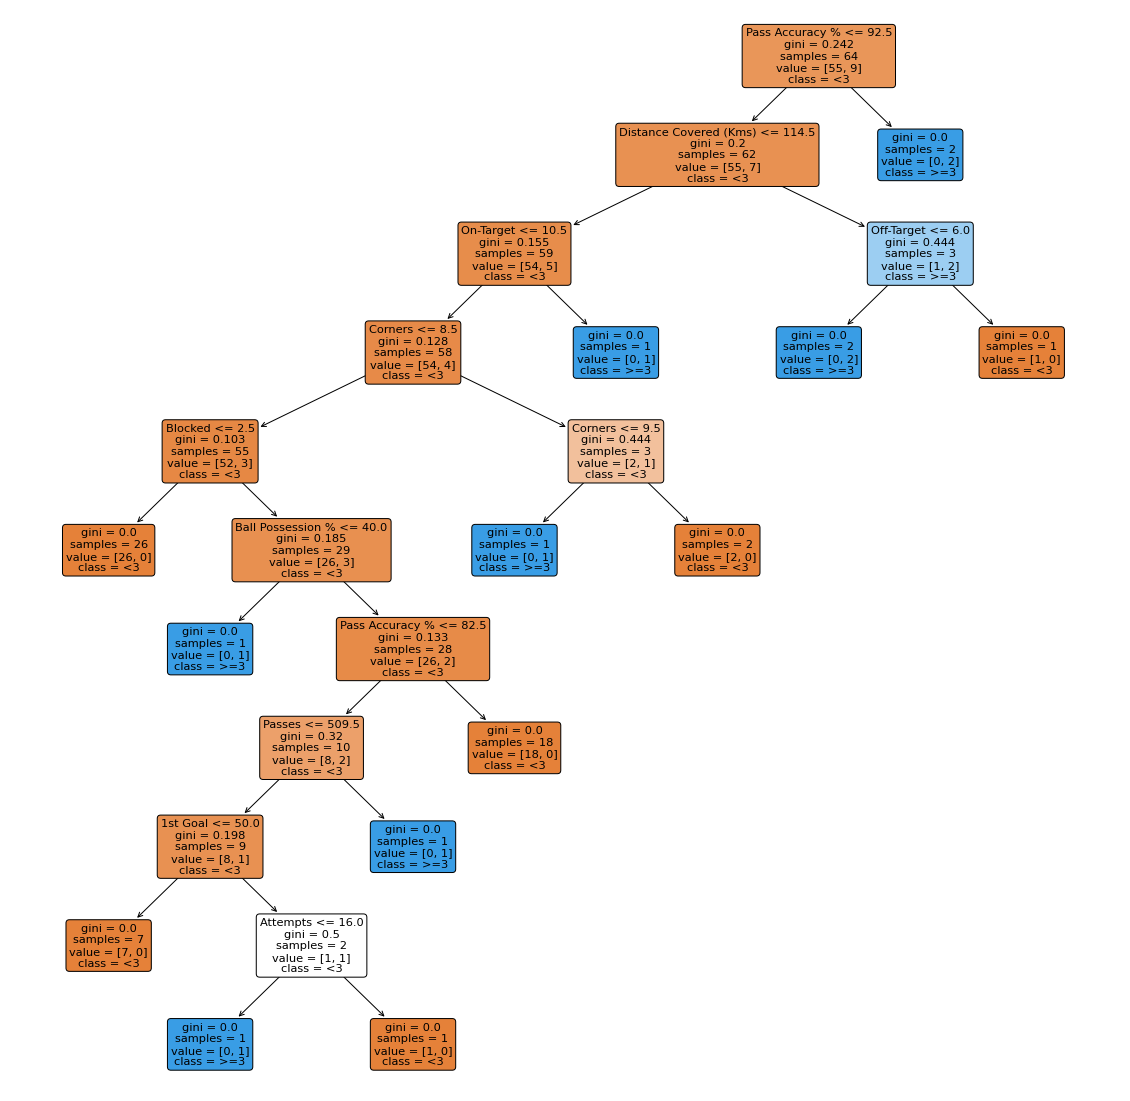

In [14]:
#x = tree.plot_tree(clf,feature_names=features,class_names=labels.astype(str),rounded=True,filled=True) 
x = tree.plot_tree(clf,rounded=True,filled=True,class_names=sorted,feature_names=features) 

In [15]:
#testData = pd.read_csv("../src/test/resources/CelticsTest.csv")
testData = pd.read_csv("fifa_18_test_data.csv")
testData["1st Goal"] = testData["1st Goal"].fillna(0)
testData

,Date,Team,Opponent,Goal Scored,G>=3,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,25-06-2018,Uruguay,Russia,3,>=3,56,17,7,6,4,4,0,20,1,88,492,101,17,1,0,0,Yes,10.0,Group Stage,No,0,NaN,NaN
1,25-06-2018,Russia,Uruguay,0,<3,44,3,1,1,1,2,2,17,5,83,355,98,18,1,1,0,No,0.0,Group Stage,No,0,1.0,23.0
2,25-06-2018,Saudi Arabia,Egypt,2,<3,61,22,7,10,5,7,1,19,0,90,655,101,7,0,0,0,No,45.0,Group Stage,No,0,NaN,NaN
3,25-06-2018,Egypt,Saudi Arabia,1,<3,39,8,1,6,1,2,3,8,5,82,357,106,16,2,0,0,Yes,22.0,Group Stage,No,0,NaN,NaN
4,25-06-2018,Spain,Morocco,2,<3,68,16,4,11,1,7,1,18,1,91,762,103,5,0,0,0,Yes,19.0,Group Stage,No,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,11/7/2018,England,Croatia,1,<3,46,11,1,6,4,4,3,24,5,79,479,148,14,1,0,0,No,5.0,Semi- Finals,No,0,NaN,NaN
60,14-07-2018,Belgium,England,2,<3,43,12,4,3,5,4,1,5,5,88,510,108,11,1,0,0,Yes,4.0,3rd Place,No,0,NaN,NaN
61,14-07-2018,England,Belgium,0,<3,57,15,5,7,3,5,0,12,2,92,698,110,5,2,0,0,No,0.0,3rd Place,No,0,NaN,NaN
62,15-07-2018,France,Croatia,4,>=3,39,8,6,1,1,2,1,14,1,75,271,99,14,2,0,0,Yes,18.0,Final,No,0,1.0,18.0


In [16]:
#get X features
XTest = testData.loc[:,features]
XTest

,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),1st Goal
0,56,17,7,6,4,4,0,20,1,88,492,101,10.0
1,44,3,1,1,1,2,2,17,5,83,355,98,0.0
2,61,22,7,10,5,7,1,19,0,90,655,101,45.0
3,39,8,1,6,1,2,3,8,5,82,357,106,22.0
4,68,16,4,11,1,7,1,18,1,91,762,103,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,46,11,1,6,4,4,3,24,5,79,479,148,5.0
60,43,12,4,3,5,4,1,5,5,88,510,108,4.0
61,57,15,5,7,3,5,0,12,2,92,698,110,0.0
62,39,8,6,1,1,2,1,14,1,75,271,99,18.0


In [17]:
YTest = testData["G>=3"]
YTest

0     >=3
1      <3
2      <3
3      <3
4      <3
     ... 
59     <3
60     <3
61     <3
62    >=3
63     <3
Name: G>=3, Length: 64, dtype: object

In [18]:
#make predictions on test data 
YPredicted = clf.predict(XTest)
YPredicted

array(['<3', '<3', '<3', '<3', '<3', '<3', '<3', '<3', '<3', '<3', '<3',
       '<3', '<3', '<3', '<3', '<3', '>=3', '<3', '<3', '<3', '<3', '>=3',
       '<3', '<3', '<3', '<3', '<3', '<3', '<3', '<3', '<3', '<3', '<3',
       '<3', '<3', '<3', '>=3', '>=3', '<3', '<3', '<3', '<3', '<3', '<3',
       '>=3', '<3', '<3', '<3', '<3', '<3', '<3', '<3', '<3', '>=3',
       '>=3', '<3', '>=3', '<3', '<3', '>=3', '<3', '<3', '<3', '<3'],
      dtype=object)

In [19]:
#YTest

In [20]:
#calculate accuracy
from sklearn import metrics
accuracy = metrics.accuracy_score(YTest,YPredicted)
accuracy

0.765625

[30.0, 5.0]
[[49  9]
 [ 6  0]]


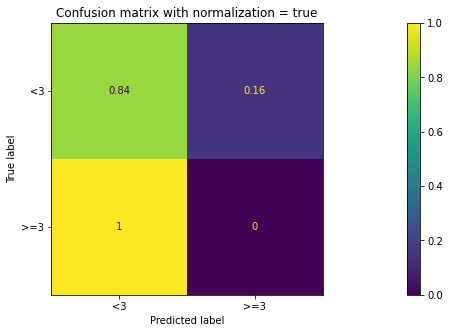

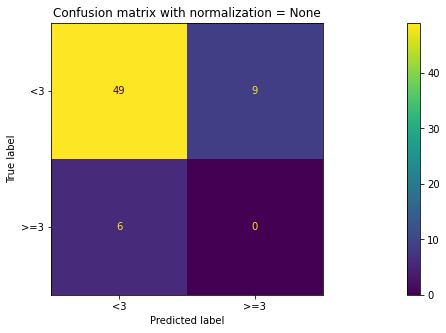

In [21]:
#setup plots for confusion matrix
from sklearn.metrics import plot_confusion_matrix as matrix
figSize = plt.rcParams["figure.figsize"]
figSize[0] = 30
figSize[1] = 5
plt.rcParams["figure.figsize"]=figSize
print(plt.rcParams.get('figure.figsize'))

#plot the confusion matrices 1 for normalzied the other un-normalized
values = ['true',None]
#cmap='cividis'
for x in values:
    disp = matrix(clf,XTest,YTest,display_labels=sorted,normalize=x)
    disp.ax_.set_title("Confusion matrix with normalization = "+str(x))
print(disp.confusion_matrix)

In [22]:
#get false positives
#pd.set_option('display.max_rows',100)
testData[(YTest!=YPredicted)&(YPredicted==">=3")]

,Date,Team,Opponent,Goal Scored,G>=3,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
16,27-06-2018,Korea Republic,Germany,2,<3,30,11,5,5,1,3,0,8,7,74,237,118,16,4,0,0,Yes,90.0,Group Stage,No,0,NaN,NaN
21,27-06-2018,Brazil,Serbia,2,<3,56,13,6,3,4,9,4,15,1,88,631,105,7,0,0,0,Yes,36.0,Group Stage,No,0,NaN,NaN
36,1/7/2018,Spain,Russia,1,<3,75,25,9,6,10,6,1,20,0,91,1137,137,5,1,0,0,No,12.0,Round of 16,Yes,3,NaN,NaN
37,1/7/2018,Russia,Spain,1,<3,25,6,1,3,2,5,1,6,9,72,284,146,19,2,0,0,Yes,41.0,Round of 16,Yes,4,1.0,12.0
44,3/7/2018,Sweden,Switzerland,1,<3,37,12,3,6,3,3,1,13,4,73,271,105,11,1,0,0,Yes,66.0,Round of 16,No,0,NaN,NaN
53,7/7/2018,England,Sweden,2,<3,57,12,2,4,6,6,1,12,3,80,525,110,7,1,0,0,Yes,30.0,Quarter Finals,No,0,NaN,NaN
54,7/7/2018,Russia,Croatia,2,<3,38,13,7,4,2,6,1,18,1,69,399,148,25,1,0,0,No,31.0,Quarter Finals,Yes,3,NaN,NaN
56,10/7/2018,France,Belgium,1,<3,40,19,5,8,6,4,1,17,3,86,342,102,6,2,0,0,Yes,51.0,Semi- Finals,No,0,NaN,NaN
59,11/7/2018,England,Croatia,1,<3,46,11,1,6,4,4,3,24,5,79,479,148,14,1,0,0,No,5.0,Semi- Finals,No,0,NaN,NaN


In [23]:
#get false negative
#pd.set_option('display.max_rows',100)
testData[(YTest!=YPredicted)&(YPredicted=="<3")]

,Date,Team,Opponent,Goal Scored,G>=3,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,25-06-2018,Uruguay,Russia,3,>=3,56,17,7,6,4,4,0,20,1,88,492,101,17,1,0,0,Yes,10.0,Group Stage,No,0,NaN,NaN
19,27-06-2018,Sweden,Mexico,3,>=3,35,13,5,7,1,3,0,16,3,67,212,102,11,2,0,0,Yes,50.0,Group Stage,No,0,NaN,NaN
32,30-06-2018,France,Argentina,4,>=3,41,9,4,4,1,0,0,16,1,84,351,97,21,3,0,0,Yes,13.0,Round of 16,No,0,NaN,NaN
33,30-06-2018,Argentina,France,3,>=3,59,9,4,1,4,4,1,21,0,86,547,96,15,5,0,0,No,41.0,Round of 16,No,0,NaN,NaN
42,2/7/2018,Belgium,Japan,3,>=3,56,24,8,10,6,10,1,10,3,87,621,108,13,0,0,0,Yes,69.0,Round of 16,No,0,NaN,NaN
62,15-07-2018,France,Croatia,4,>=3,39,8,6,1,1,2,1,14,1,75,271,99,14,2,0,0,Yes,18.0,Final,No,0,1.0,18.0
